# TKO_7092 Evaluation of Machine Learning Methods 2025

---

Student name: Mst Ayesha Sultana

Student number: 2406862

Student email: ayesha.m.sultana@utu.fi

---

## Exercise 3

Complete the tasks given to you in the letter below. In your submission, explain clearly, precisely, and comprehensively why the cross-validation described in the letter failed, what is the correct way to perform cross-validation in the given scenario, and why the correct cross-validation method will give a reliable estimate of the generalisation performance. Then implement the correct cross-validation for the scenario and report its results.

Remember to follow all the general exercise guidelines that are stated in Moodle. Full points (2p) will be given for a submission that demonstrates a deep understanding of cross-validation on pair-input data and implements the requested cross-validation correctly (incl. reporting the results). Partial points (1p) will be given if there are small error(s) but the overall approach is correct. No points will be given if there are significant error(s).

The deadline of this exercise is **Wednesday 19 February 2025 at 11:59 PM**. Please contact Juho Heimonen (juaheim@utu.fi) if you have any questions about this exercise.

---


Dear Data Scientist,

I have a long-term research project regarding a specific set of proteins. I am attempting to discover small organic compounds that can bind strongly to these proteins and thus act as drugs. I have already made laboratory experiments to measure the affinities between some proteins and drug molecules.

My colleague is working on another set of proteins, and the objectives of his project are similar to mine. He has recently discovered thousands of new potential drug molecules. He asked me if I could find the pairs that have the strongest affinities among his proteins and drug molecules. Obviously I do not have the resources to measure all the possible pairs in my laboratory, so I need to prioritise. I decided to do this with the help of machine learning, but I have encountered a problem.

Here is what I have done so far: First I trained a K-nearest neighbours regressor with the parameter value K=10 using all the 400 measurements I had already made in the laboratory with my proteins and drug molecules. They comprise of 77 target proteins and 59 drug molecules. Then I performed a leave-one-out cross-validation with this same data to estimate the generalisation performance of the model. I used C-index and got a stellar score above 90%. Finally I used the model to predict the affinities of my colleague's proteins and drug molecules. The problem is: when I selected the highest predicted affinities and tried to verify them in the lab, I found that many of them are much lower in reality. My model clearly does not work despite the high cross-validation score.

Please explain why my estimation failed and how leave-one-out cross-validation should be performed to get a reliable estimate. Also, implement the correct leave-one-out cross-validation and report its results. I need to know whether it would be a waste of my resources if I were to use my model any further.

The data I used to create my model is available in the files `input.data`, `output.data` and `pairs.data` for you to use. The first file contains the features of the pairs, whereas the second contains their affinities. The third file contains the identifiers of the drug and target molecules of which the pairs are composed. The files are paired, i.e. the i<sup>*th*</sup> row in each file is about the same pair.

Looking forward to hearing from you soon.

Yours sincerely, \
Bio Scientist

---

#### Answer the questions about cross-validation on pair-input data

In [6]:
# Why did the estimation described in the letter fail?
# How should leave-one-out cross-validation be performed in the given scenario and why?
# Remember to provide comprehensive and precise arguments.

#### Why did the estimation fail? ####

The estimation failed because <b> the cross-validation method did not account for the dependencies in pair-input data</b>, leading to an <b>overestimated</b> performance score that did not reflect real-world generalization.

1. <b>Drug-Protein Interactions are Pair-Input Data</b>

    In pair-input data, each observation consists of a pair of objects (e.g., drug, protein). Because the same drug can interact with multiple proteins (and vice versa), <b> objects are shared between observations</b>. Since the same drug or protein appears in multiple pairs, the observations are <b>not independent</b>, they share information. 

    - In traditional machine learning, we assume observations are independent.
    - But in pair-input data, observations depend on each other due to shared objects.

2. <b>Violation of Independence Assumption in LOOCV</b>
    - Leave-One-Out Cross-Validation (LOOCV) assumes that each sample is independent, but in pair-input data, observations are dependent because proteins and drugs appear in multiple pairs.
    - When a pair (Protein A, Drug X) was left out for testing, the training set still contained other pairs involving Protein A and/or Drug X.
    - As a result, the model already had information about the test data, making predictions artificially accurate.

3. <b>Overestimated Performance Due to Data Leakage</b>
    - Since the model saw similar data during training, it easily predicted the left-out test pair, resulting in a high C-index (>90%).
    - This created a false impression that the model generalized well, when in reality, it only performed well within the dataset.

4. <b>Failure to Generalize to Unseen Data</b>
    - When the trained model was applied to completely new proteins and drugs, it failed.
    - The model had never been tested on truly unseen data during LOOCV, so it was unable to make reliable predictions in the real-world setting

In summary, the estimation failed because LOOCV allowed data leakage, violating the independence assumption and inflating the model’s performance. This caused the model to appear highly accurate but fail on unseen drug-protien interactions.

#### How should leave-one-out cross-validation be performed? ####


The key to improving cross-validation is recognizing that real-world test data may have different levels of similarity to training data. The four types of out-of-sample observations are:

- Type A Protein(Seen) Drug(Seen): Strong Dependencies with Training Data (Both pair members appeared in training)
- Type B Protein(New) Drug(Seen): Medium Dependencies with Training Data(One pair member is new, the other was in training)
- Type C Protein(Seen) Drug(New): Medium Dependencies with Training Data (One pair member is new, the other was in training)
- Type D Protein(New) Drug(New): No Dependencies with Training Data (Completely unseen pair)

<b>Modify LOOCV for Pair-Input Data</b>

Each type of out-of-sample observation requires a different way to form training sets to remove data leakage.

- ##### Type A: Regular LOOCV Works
  
  Since both objects exist in the training set, standard LOOCV is appropriate. This is the only case where the standard method does not overestimate performance.
  
- ##### Type B: Leave-First-Object-Out Cross-Validation

  Since the first object (protein) is new, we must remove all training pairs that contain this protein. This ensures the test sample is not influenced by any prior knowledge about this protein.

- ##### Type C: Leave-Second-Object-Out Cross-Validation

  Since the second object (drug) is new, we must remove all training pairs that contain this drug. This prevents the model from seeing any similar drug interactions before testing.


- ##### Type D: Leave-Both-Objects-Out Cross-Validation

  Since both objects are completely new, the training set must not contain any pairs with either the protein or drug. This gives the most realistic estimate for discovering new drug-protein interactions but also results in the smallest training set.

This variation in test conditions helps capture how well the model generalizes across different levels of similarity to training data, giving more nuanced and realistic performance estimates.

<b> Avoiding Overestimation of Performance</b>

    By using these methods, the model is tested in conditions where dependencies between training and test data are minimized. This means that the performance metrics (e.g., C-index) reflect true generalization capabilities, rather than the model's ability to memorize specific training instances. For example, Type D is the hardest case, where the model has never seen either object, and the performance here will truly reflect the model's ability to generalize to new drug-protein interactions.

<b> Reflecting Practical Use-Cases</b>

    In real-world applications, models like these are often deployed to predict interactions between drugs and proteins that have never been seen before. A cross-validation method that simulates this scenario (e.g., Type D performance) gives the most valuable insights into how well the model is likely to perform when faced with novel data, making the cross-validation process more aligned with practical, real-world expectations.

The correct cross-validation method ensures that performance estimates are not biased by dependencies in the data, and that they more accurately reflect the model's generalization performance on unseen data. By simulating realistic scenarios where the test data consists of objects that the model has never seen before, these methods offer a much more trustworthy and reliable estimate of how the model will perform in real-world applications.

#### Import libraries

In [10]:
# Import the libraries you need.
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import LeaveOneOut
from scipy.stats import somersd
import matplotlib.pyplot as plt

#### Write utility functions

In [12]:
# Write the utility functions you need in your analysis.

# Calculate C index
def cindex(true, pred):
    s_d = somersd(true, y=pred, alternative='two-sided')
    c_index = (s_d.statistic + 1.0)/2.0
    return c_index

#This function generates train-test splits where one protein is left out for testing,
# and the rest are used for training. The function yields the indices for each split.
def leave_one_protein_out_cv(pairs):
    unique_proteins = pairs["Protein"].unique()
    for protein in unique_proteins:
        train_idx = pairs[pairs["Protein"] != protein].index
        test_idx = pairs[pairs["Protein"] == protein].index
        yield train_idx, test_idx

# This function generates train-test splits where one drug is left out for testing,
# and the rest are used for training. The function yields the indices for each split.
def leave_one_drug_out_cv(pairs):
    unique_drugs = pairs["Drug"].unique()
    for drug in unique_drugs:
        train_idx = pairs[pairs["Drug"] != drug].index
        test_idx = pairs[pairs["Drug"] == drug].index
        yield train_idx, test_idx

# This function generates train-test splits where both the protein and drug in the test pair are excluded from the training set. 
# It ensures that neither object in the test pair is seen during training.
def leave_both_out_cv(pairs):
    for idx in range(len(pairs)):
        # Get the protein and drug for the current test pair
        test_protein = pairs.iloc[idx]['Protein']
        test_drug = pairs.iloc[idx]['Drug']
        
        # Filter out any rows where either the protein or the drug matches the test pair
        train_idx = pairs[(pairs['Protein'] != test_protein) & (pairs['Drug'] != test_drug)].index
        test_idx = [idx]  # The current pair is the test sample
        
        yield train_idx, test_idx

# Function to evaluate model with given cv methods
def evaluate_knn(X, y, pairs, cv_method, k=10):
    knn = KNeighborsRegressor(n_neighbors=k)
    y_true, y_pred = [], []
    
    for train_idx, test_idx in cv_method(pairs):
        X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
        y_train, y_test = y[train_idx], y[test_idx]
        
        knn.fit(X_train, y_train)
        pred = knn.predict(X_test)
        
        y_true.extend(y_test)
        y_pred.extend(pred)
    
    return y_true, y_pred

# Function to create a scatter plot
def plot_scatter(ax, y_true, y_pred, title="True vs Predicted", xlabel="True Values", ylabel="Predicted Values"):
    ax.scatter(y_true, y_pred, color='blue', alpha=0.5)
    ax.plot([min(y_true), max(y_true)], [min(y_true), max(y_true)], color='red', linestyle='--')  # Line y = x
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)

#### Load datasets

In [14]:
# Read the data files (input.data, output.data, pairs.data).

# Load input output data
X = pd.read_csv("input.data", header=None, sep=r"\s+", dtype=float)  # Features as floats, space-separated
y = pd.read_csv("output.data", header=None).values.ravel()  # Affinity values

# Load pairs data and handle quotes
pairs = pd.read_csv("pairs.data", header=None, names=["Protein", "Drug"], sep=r"\s+", quotechar='"')

#### Implement and run cross-validation

In [16]:
# Implement and run the requested cross-validation. Report and interpret its results.

# Running different cross-validation methods based to the type
# For type A
y_true_A, y_pred_A = evaluate_knn(X, y, pairs, LeaveOneOut().split)
# For type B
y_true_B, y_pred_B = evaluate_knn(X, y, pairs, leave_one_protein_out_cv)
# For type C
y_true_C, y_pred_C = evaluate_knn(X, y, pairs, leave_one_drug_out_cv)
# For type D
y_true_D, y_pred_D = evaluate_knn(X, y, pairs, leave_both_out_cv)

print("Cross-validation completed for all types A, B, C, D")

Cross-validation completed for all types A, B, C, D


In [17]:
# Compute C-index for each cross-validation method
cindex_A = cindex(y_true_A, y_pred_A)
cindex_B = cindex(y_true_B, y_pred_B)
cindex_C = cindex(y_true_C, y_pred_C)
cindex_D = cindex(y_true_D, y_pred_D)

In [18]:
# Print C-index scores
print(f"C-index for Leave-One-Out CV (A): {cindex_A:.4f}")
print(f"C-index for Leave-One-Protein-Out CV (B): {cindex_B:.4f}")
print(f"C-index for Leave-One-Drug-Out CV (C): {cindex_C:.4f}")
print(f"C-index for Leave-Both-Out CV (D): {cindex_D:.4f}")

C-index for Leave-One-Out CV (A): 0.8300
C-index for Leave-One-Protein-Out CV (B): 0.5197
C-index for Leave-One-Drug-Out CV (C): 0.8295
C-index for Leave-Both-Out CV (D): 0.5218


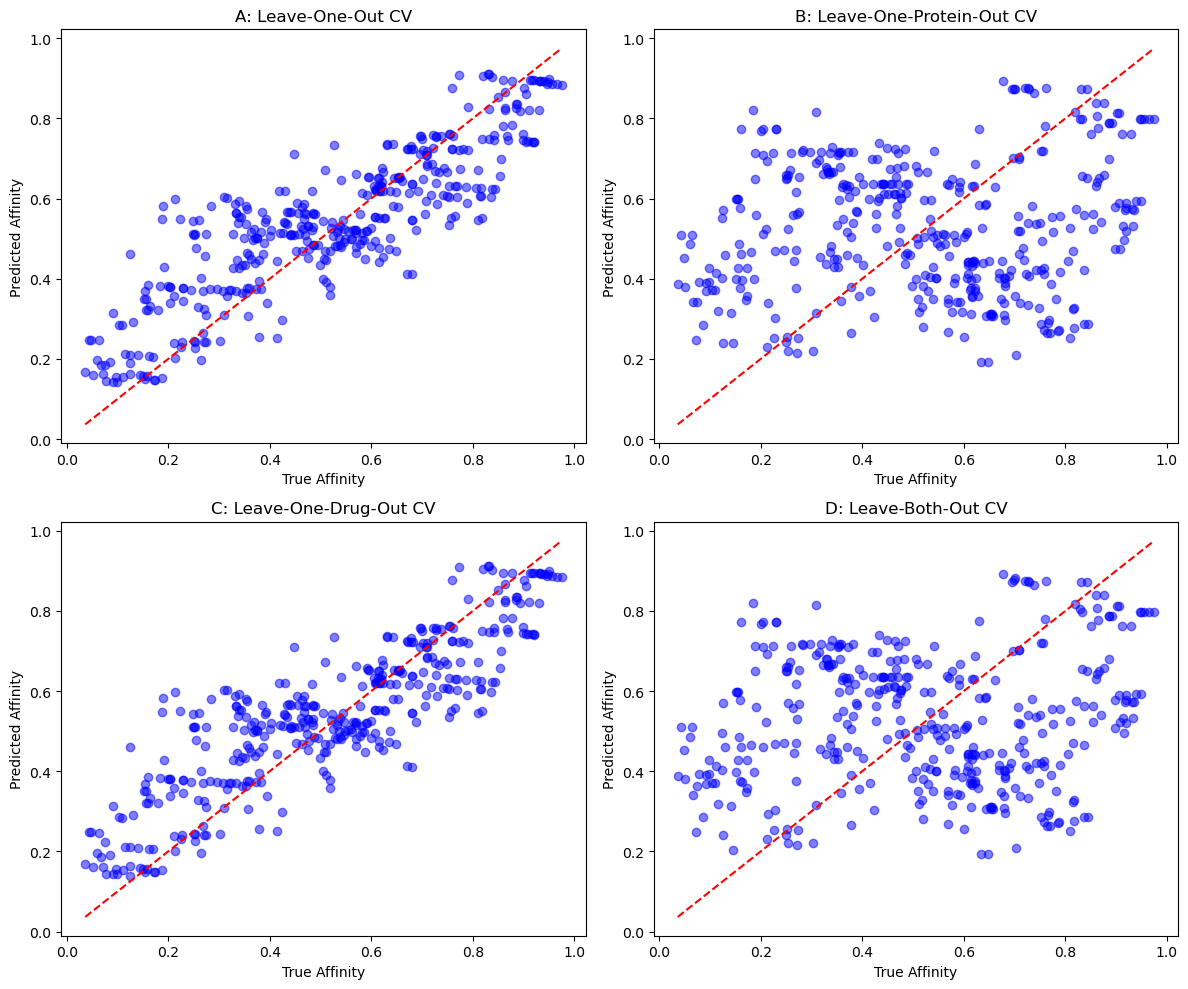

In [19]:
# Create a 2x2 grid of subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Plot for each cross-validation type
plot_scatter(axes[0, 0], y_true_A, y_pred_A, title="A: Leave-One-Out CV", xlabel="True Affinity", ylabel="Predicted Affinity")
plot_scatter(axes[0, 1], y_true_B, y_pred_B, title="B: Leave-One-Protein-Out CV", xlabel="True Affinity", ylabel="Predicted Affinity")
plot_scatter(axes[1, 0], y_true_C, y_pred_C, title="C: Leave-One-Drug-Out CV", xlabel="True Affinity", ylabel="Predicted Affinity")
plot_scatter(axes[1, 1], y_true_D, y_pred_D, title="D: Leave-Both-Out CV", xlabel="True Affinity", ylabel="Predicted Affinity")

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

#### Report on the Results for Cross-Validation Methods

In this experiment, the C-index was computed for four different cross-validation methods, assessing their performance for predicting drug-protein interactions:

1. <b> Leave-One-Out Cross-Validation (A):</b>
    - C-index: 0.8300.
    - This method, which evaluates the model by removing one observation at a time, yielded the highest C-index, indicating strong model performance.

2. <b> Leave-One-Protein-Out Cross-Validation (B):</b>
    - C-index: 0.5197.
    - This method, where the model is tested on unseen proteins, resulted in the lowest C-index, suggesting a significant decrease in performance when proteins are not part of the training set.
  
3. <b> Leave-One-Drug-Out Cross-Validation (C): </b>
    - C-index: 0.8295.
    - Similar to Leave-One-Out CV, this method, which removes a drug for testing, showed a performance close to the standard LOOCV with a C-index of 0.8295.

4. <b> Leave-Both-Out Cross-Validation (D): </b>
    - C-index: 0.5218.
    - Removing both the protein and the drug from the training set when testing resulted in a C-index similar to Leave-One-Protein-Out, demonstrating lower performance in predicting interactions with unseen combinations.

Conclusion:
- <b>Best performance:</b> Leave-One-Out Cross-Validation (A) exhibited the best model performance.
- <b>Lower performance:</b> Both Leave-One-Protein-Out (B) and Leave-Both-Out (D) Cross-Validation methods showed a significant decrease in performance, which is expected as these methods involve testing on unseen objects (proteins and/or drugs).